In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


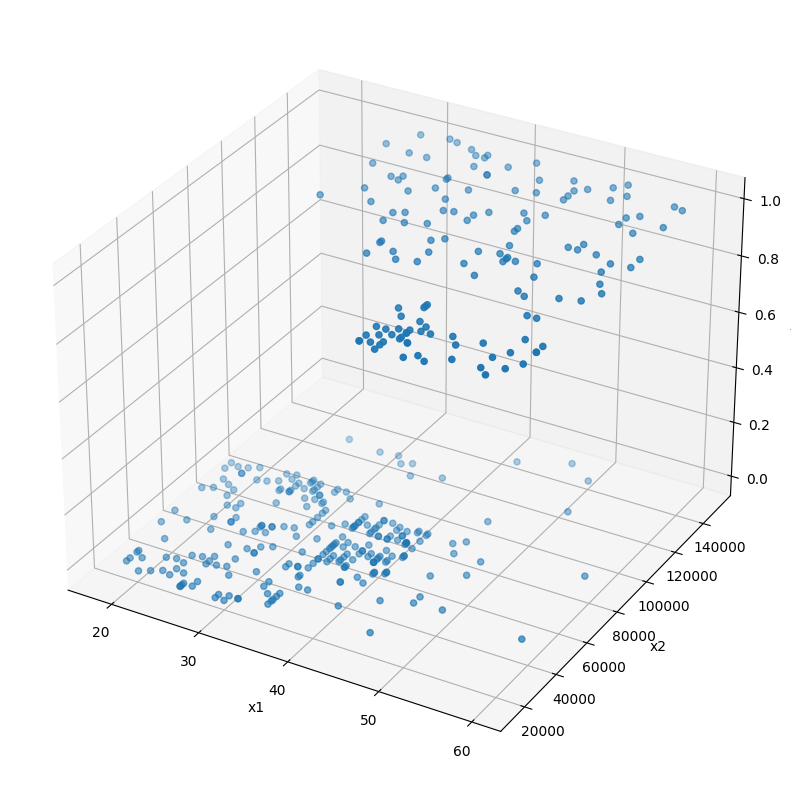

In [26]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_scatter(x1, x2, y, ax=None, fig = None):
    if (fig is None) and (ax is None):
        fig = plt.figure(figsize = (15,10))
        ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1, x2, y)

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')

plot_3d_scatter(data['Age'],
                data['EstimatedSalary'],
                data['Purchased'],
                ax=None,
                fig = None)

In [32]:
short_df = data.drop(['User ID', 'Gender'], axis=1)
short_df


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


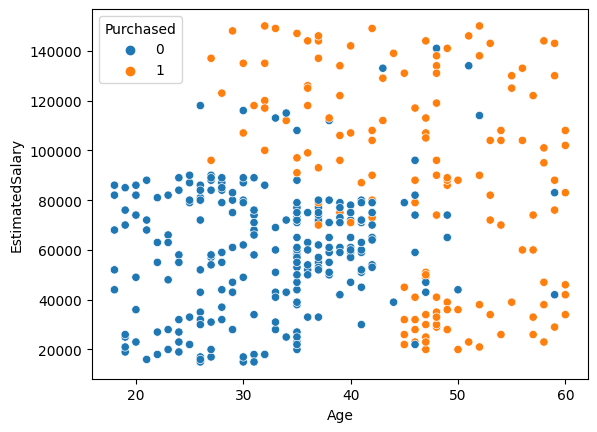

In [33]:

# Create a scatter plot with Seaborn
sns.scatterplot(x='Age',
                y='EstimatedSalary',
                hue='Purchased',
                data=short_df)

# The hue parameter is set to 'binary_class', which means that the points will be colored based on the values in the binary_class column.
# Seaborn automatically assigns different colors to different classes.

# Show the plot
plt.show()

In [16]:
## Regresión logística

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# The accuracy variable will contain a float between 0 and 1, representing the accuracy of the model. 
# It compares the predicted labels to the true labels and returns the proportion of correctly classified samples
# A value of 1.0 indicates perfect accuracy, while a lower value indicates a lower proportion of correctly classified samples.

X = data[['Age','EstimatedSalary']]
y = data[['Purchased']]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 123)

modelo_regresionlogistica = LogisticRegression()
modelo_regresionlogistica.fit(X_train, y_train)

y_pred = modelo_regresionlogistica.predict(X_test) ## Punto de corte por defecto es 0.5
preds_proba = modelo_regresionlogistica.predict_proba(X_test)

# Preds_Proba is an array where each row corresponds to a sample in X_test, and each column represents the probability of that sample belonging to a specific class.
preds_proba

# the output are the probabilities to be either 0 or 1. As all probs are more likely to be 0, the following result is clear.

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[0.5881269 , 0.4118731 ],
       [0.58504168, 0.41495832],
       [0.56248849, 0.43751151],
       [0.51192504, 0.48807496],
       [0.5515015 , 0.4484985 ],
       [0.53967398, 0.46032602],
       [0.5459884 , 0.4540116 ],
       [0.6080024 , 0.3919976 ],
       [0.56874006, 0.43125994],
       [0.59120519, 0.40879481],
       [0.53413831, 0.46586169],
       [0.5617056 , 0.4382944 ],
       [0.55150152, 0.44849848],
       [0.53492965, 0.46507035],
       [0.54756479, 0.45243521],
       [0.55700199, 0.44299801],
       [0.56639815, 0.43360185],
       [0.52621594, 0.47378406],
       [0.54046402, 0.45953598],
       [0.5515015 , 0.4484985 ],
       [0.51748622, 0.48251378],
       [0.54914022, 0.45085978],
       [0.5135143 , 0.4864857 ],
       [0.59274167, 0.40725833],
       [0.56327105, 0.43672895],
       [0.6057259 , 0.3942741 ],
       [0.54125385, 0.45874615],
       [0.61178608, 0.38821392],
       [0.54677672, 0.45322328],
       [0.55935512, 0.44064488],
       [0.

In [18]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate the model

# The function compares the true labels to the predicted labels and returns the proportion of correctly classified samples.
# represents the proportion of correctly predicted instances out of the total instances.
# It gives a general sense of how well the model is performing across all classes.


# In the context of classification metrics such as accuracy, precision, recall, and the confusion matrix,
# a "class" refers to the different categories or labels that your model is trying to predict.
# Each category or label represents a distinct class. 
# For example, in binary classification, you have two classes: the positive class (often denoted as 1)
# and the negative class (often denoted as 0). In a medical diagnosis scenario,
# the positive class might represent patients with a certain condition, and the negative class might represent patients without that condition.

# In multi-class classification, you have more than two classes.
# For instance, if you are classifying animals into categories like "cat," "dog,"
#  and "bird," each of these categories is considered a class.




accuracy = accuracy_score(y_test, y_pred)

# The confusion matrix provides information about true positives, true negatives, false positives, and false negatives.
# True Positive (TP): Instances where the model correctly predicts the positive class.
# True Negative (TN): Instances where the model correctly predicts the negative class.
# False Positive (FP): Instances where the model incorrectly predicts the positive class.
# False Negative (FN): Instances where the model incorrectly predicts the negative 

conf_matrix = confusion_matrix(y_test, y_pred)

# It generates a text report showing the main classification metrics, including precision, recall, F1-score, and support.

# Precision: The ability of the classifier not to label as positive a sample that is negative. Precision is concerned with false positives.
# Recall (Sensitivity or True Positive Rate): The ability of the classifier to find all the positive samples. Recall is concerned with false negatives.
# F1-score: The harmonic mean of precision and recall. It provides a balance between precision and recall.
# Support: The number of actual occurrences of the class in the specified dataset.

classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)
print('\nPredicted Probabilities:')
print(preds_proba)

Accuracy: 0.6250

Confusion Matrix:
[[50  0]
 [30  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      1.00      0.77        50
           1       0.00      0.00      0.00        30

    accuracy                           0.62        80
   macro avg       0.31      0.50      0.38        80
weighted avg       0.39      0.62      0.48        80


Predicted Probabilities:
[[0.5881269  0.4118731 ]
 [0.58504168 0.41495832]
 [0.56248849 0.43751151]
 [0.51192504 0.48807496]
 [0.5515015  0.4484985 ]
 [0.53967398 0.46032602]
 [0.5459884  0.4540116 ]
 [0.6080024  0.3919976 ]
 [0.56874006 0.43125994]
 [0.59120519 0.40879481]
 [0.53413831 0.46586169]
 [0.5617056  0.4382944 ]
 [0.55150152 0.44849848]
 [0.53492965 0.46507035]
 [0.54756479 0.45243521]
 [0.55700199 0.44299801]
 [0.56639815 0.43360185]
 [0.52621594 0.47378406]
 [0.54046402 0.45953598]
 [0.5515015  0.4484985 ]
 [0.51748622 0.48251378]
 [0.54914022 0.45085978]
 [0.5135143  0.486

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [25]:
threshold = 0.4

preds_threshold = np.where(preds_proba[:,1]>threshold, 1,0)

# Another way Convert probabilities to binary predictions based on the threshold
# y_pred_binary = (preds_proba[:, 1] > threshold).astype(int)

print('Threshold 0.5:',accuracy_score(y_test, y_pred))
print('Threshold 0.4:',accuracy_score(y_test, preds_threshold))

Threshold 0.5: 0.625
Threshold 0.4: 0.2375


In [ ]:
print(modelo_regresionlogistica.coef_)
print(modelo_regresionlogistica.intercept_)

[[-6.06205439e-09 -3.18060014e-06]]
[-1.6655837e-09]


In [47]:
### Modelo KNN

# The k-Nearest Neighbors (k-NN) algorithm is a distance-based algorithm,
# and standardizing your features (also known as feature scaling or normalization) is often crucial for its performance.
# Standardization ensures that all features contribute equally to the distance computation.
# Standardization is a process that transforms the features of a dataset to have a mean of 0 and a standard deviation of 1.
# This is done to ensure that all features contribute equally to distance-based algorithms like k-Nearest Neighbors (k-NN).

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

#### Sklearn

escaler = StandardScaler()

x_train_esc = escaler.fit_transform(X_train) ### Considera promedio y std de train

# The fit_transform method computes the mean and standard deviation of each feature in the training data (X_train)
# and then standardizes the features. It both fits the scaler to the data and transforms the data in a single step.
# The result is X_train_scaled, which contains the standardized features for training.

x_test_esc = escaler.transform(X_test)

# The transform method applies the mean and standard deviation computed during the training phase to standardize the test data (X_test).
# It's important to use the same scaler that was fitted on the training data to avoid data leakage.
# The result is X_test_scaled, which contains the standardized features for testing.



In [54]:
k = 3  # or any other value for k
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(x_train_esc, y_train)
preds_knn = knn_classifier.predict(x_test_esc)
preds_proba_knn = knn_classifier.predict_proba(x_test_esc)

accuracy_score(preds_knn, y_test)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9

In [55]:

### Support vector machine

from sklearn.svm import SVC

modelo_svm = SVC(probability=True)

modelo_svm.fit(x_train_esc, y_train)
preds_svm = modelo_svm.predict(x_test_esc)
preds_proba_svm = modelo_svm.predict_proba(x_test_esc)

accuracy_score(preds_svm, y_test)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.875

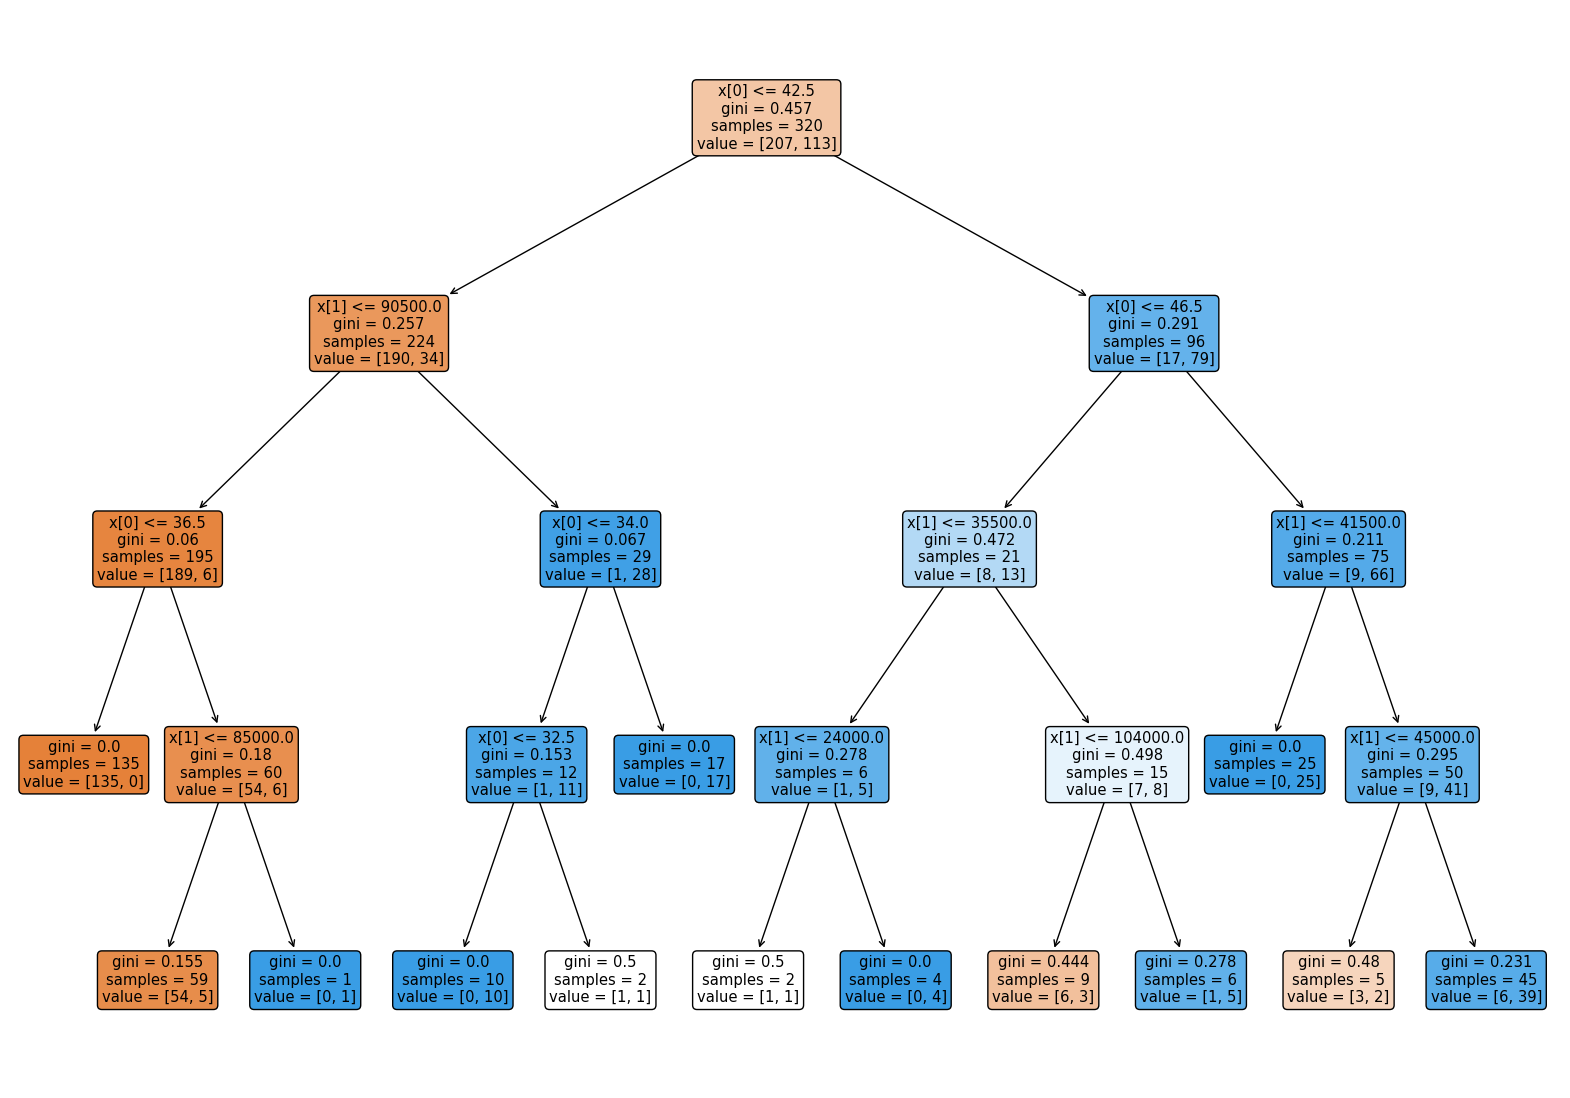

In [63]:
### Los árboles de decisión

## max_depth

from sklearn.tree import DecisionTreeClassifier, plot_tree

modelo_arbol = DecisionTreeClassifier(max_depth = 4)
modelo_arbol.fit(X_train, y_train)
preds_arbol = modelo_arbol.predict(X_test)
plt.figure(figsize=(20, 14))  # Adjust the size as needed
plot_tree(modelo_arbol, filled=True, rounded=True)
plt.show()

In [59]:
accuracy_score(preds_arbol, y_test)

0.85